# Statistics Notebook
### Topics:
Mean, Median, Mode, NumPy, Variance, Satndard Deviation, percentail, moment, covariance vs correlation

## Mean vs. Median

Let's create some fake income data, centered around 27,000 with a normal distribution and standard deviation of 15,000, with 10,000 data points. (We'll discuss those terms more later, if you're not familiar with them.)

Then, compute the mean (average) - it should be close to 27,000:

In [15]:
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
# average = 27,000. standard dev = 15000. N = 10k
np.mean(incomes)

27275.644518425255

We can segment the income data into 50 buckets, and plot it as a histogram:

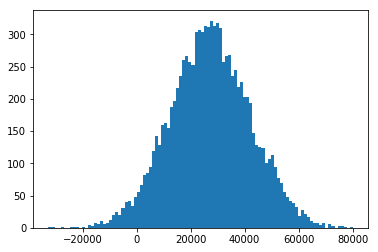

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(incomes, 100)
plt.show()

Now compute the median - since we have a nice, even distribution it too should be close to 27,000:

In [3]:
np.median(incomes)

26891.56982881893

#### Adding Outliers changes average but median indicate center point
Now we'll add Donald Trump into the mix. Darn income inequality!

In [4]:
incomes = np.append(incomes, [1000000000])

The median won't change much, but the mean does:

In [5]:
np.median(incomes)

26893.61279193568

In [6]:
np.mean(incomes)

126971.87431932072

## Mode

Next, let's generate some fake age data for 500 people:

In [7]:
ages = np.random.randint(18, high=90, size=500)
ages

array([72, 78, 79, 70, 73, 31, 55, 54, 63, 82, 89, 23, 83, 76, 79, 57, 87,
       53, 71, 18, 56, 43, 51, 73, 81, 76, 32, 49, 72, 35, 86, 32, 26, 78,
       19, 89, 75, 85, 37, 78, 45, 20, 48, 23, 63, 35, 76, 81, 84, 44, 44,
       54, 88, 71, 85, 47, 49, 87, 65, 74, 28, 31, 21, 21, 33, 32, 64, 61,
       19, 26, 52, 36, 41, 34, 44, 34, 81, 85, 21, 37, 28, 65, 33, 77, 76,
       46, 22, 54, 72, 38, 32, 86, 41, 28, 60, 85, 64, 47, 54, 66, 78, 52,
       18, 76, 44, 68, 54, 77, 83, 63, 88, 21, 23, 53, 72, 58, 71, 18, 71,
       40, 60, 81, 77, 19, 55, 81, 42, 25, 76, 73, 21, 69, 42, 18, 30, 85,
       46, 34, 70, 85, 74, 88, 88, 35, 24, 39, 73, 84, 52, 39, 84, 34, 37,
       62, 78, 19, 75, 26, 74, 79, 48, 31, 58, 44, 52, 65, 24, 66, 70, 87,
       49, 25, 24, 22, 44, 52, 43, 84, 39, 47, 54, 68, 25, 25, 79, 69, 55,
       50, 69, 28, 39, 20, 41, 66, 88, 71, 45, 66, 45, 44, 60, 80, 59, 78,
       23, 39, 79, 79, 55, 36, 85, 18, 25, 82, 55, 48, 30, 70, 29, 64, 59,
       34, 45, 46, 82, 66

In [8]:
from scipy import stats
stats.mode(ages)

ModeResult(mode=array([26]), count=array([14]))

## Standard Dev Vs Variance

In [13]:
#standard deviation
incomes.std()

9998741.557795564

In [14]:
#variance
incomes.var()

99974832739588.05

## Percentile

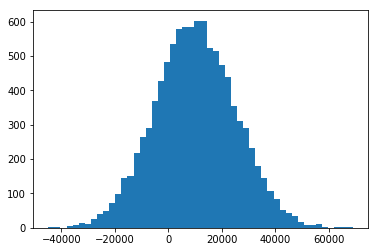

In [3]:
import matplotlib.pyplot as plt
import numpy as np

income_tax = np.random.normal(10000, 15000, 10000)
plt.hist(income_tax, 50)
plt.show()

In [4]:
np.percentile(income_tax, 10)
# -9513.43, when stddev = 15000
# 9935.23, when stddev = 50

-9234.856792146222

In [5]:
np.percentile(income_tax,90)
# 28k, when stddev = 15000
# 10063, when stddev = 50

22715.702986522454

In [6]:
income_tax

array([-14745.14295217,  19933.45745099,  14656.4586401 , ...,
        10310.26253824,  13767.6496555 ,  29166.86645166])

## 4 Moments:
Quantitive shape of the Probability Density Function.
* first moment is the average
* second moment is the variance
* third moment is the skew: - since our data is nicely centered around 0, it should be almost 0:
* fourth moment is the kutosis:  which describes the shape of the tail. For a normal distribution, this is 0
</br>
### Understanding skew: change the normal distribution to be centered around 10 instead of 0, and see what effect that has on the moments.
* The skew is still near zero; skew is associated with the shape of the distribution, not its actual offset in X.
* generally, if std reduces the kutosis increases. since it makes the peak higher

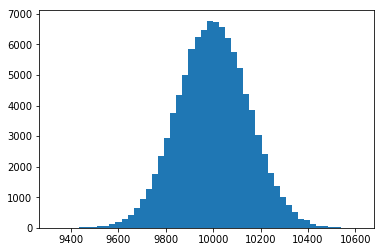

In [26]:
import numpy as np
import matplotlib.pyplot as plt

myvalues = np.random.normal(10000, 150, 100000)
plt.hist(myvalues, 50)
plt.show()

first moment is the average

In [20]:
np.mean(myvalues)

10024.380045811413

second moment is variance

In [21]:
np.var(myvalues)

225219503.42338273

third moment is the skew

In [12]:
import scipy.stats as sp
sp.skew(myvalues)
# for normal distribution skew is almost 0. nethier positive or negatively skewed

0.0031529348631552843

fourth moment is the kutosis

In [27]:
sp.kurtosis(myvalues)
# for normal distribution the kutosis is closer to 0
# kartosis indicates how high the peak is 
# if std reduces the kutosis increases

0.009246055415216059

## Covariance vs Correlation
* Covariance ranges from -infinity to infinity, difficult to interprate
* Correlation ranges from -1(negative correlation) to 1(prefect correlation)

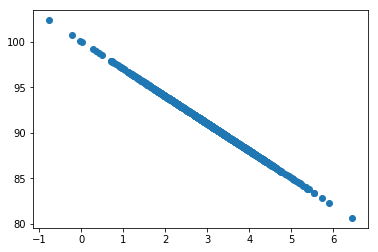

In [11]:
import numpy as np
import matplotlib.pyplot as plt

pageSpeed = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

#faking a correlation
# purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeed
purchaseAmount = 100 - pageSpeed * 3


plt.scatter(pageSpeed, purchaseAmount)


In [12]:
#covariance check with numpy cov() method
np.cov(pageSpeed, purchaseAmount)

array([[ 0.95843873, -2.87531619],
       [-2.87531619,  8.62594857]])

In [13]:
#correlation with numpy corcof
np.corrcoef(pageSpeed, purchaseAmount)

array([[ 1., -1.],
       [-1.,  1.]])

In [27]:
#Covariance and Correlation custom function

from pylab import *

#return list of deviation from mean value
def de_mean(x):
    xmean = np.mean(x)
    return [ xi - xmean for xi in x ]

def covariance(x,y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

def correlation(x,y):
    return covariance(x,y) / np.std(x) / np.std(y)

def correlation2(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #In real life you'd check for divide by zero here


In [28]:
covariance(pageSpeed, purchaseAmount)

-2.8753161889592493

In [29]:
correlation2(pageSpeed, purchaseAmount)

-1.001001001001001